# Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

---

#### *Graded Challenge 7*

**Nama**      : Achmad Nauvaldi

**Batch**     : HCK-010

**Objective** : 
- Mampu memahami konsep Computer Vision/NLP.
- Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang dipilih.
- Mampu menganalisis dan menjelaskan performansi dari arsitektur Artificial Neural Network yang dibuat.

---

# Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [37]:
import glob
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from PIL import Image
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetV2B0, MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Optimizer, Adam
from tensorflow.keras.utils import load_img
from PIL import Image
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
print('Berhasil Mengimport Libraries')


Berhasil Mengimport Libraries


# DATA LOADING

In [2]:
test_files = glob.glob('cards/test/')
train_files = glob.glob('cards/train/')

for te in test_files:
  num = te.split('/')[-1].split('_')[0]
  os.rename(te,f'CATS&DOGS/test/cats{num}.jpg')
for tr in train_files:
  num = tr.split('/')[-1].split('_')[0]
  os.rename(tr,f'CATS&DOGS/train/dogs{num}.jpg')

In [3]:
import os

animal_path = {
    'cats': 'train/cats',
    'dogs': 'train/dogs',
}

base_path = '/Users/achmadnauvaldi/DS/GradedChallange7/CATS&DOGS'

for species, path in animal_path.items():
    full_path = os.path.join(base_path, path)
    class_count = len(os.listdir(full_path))
    print(f'There are {class_count} images of {species} in the data')

There are 279 images of cats in the data
There are 278 images of dogs in the data


# Analisis Jumlah Data pada Setiap Kelas

- Terdapat dua kelas dalam dataset, yaitu 'cats' dan 'dogs'.
- Jumlah data pada setiap kelas adalah sebagai berikut:
  - 'cats': 279 gambar
  - 'dogs': 278 gambar

## Kesimpulan:

- Jumlah data pada kelas 'cats' dan 'dogs' relatif seimbang, dengan perbedaan hanya satu gambar.
- Keseimbangan ini dapat mempengaruhi performa model dalam mengidentifikasi kedua kelas, tetapi perbedaan ini dianggap kecil.
- Informasi ini dapat membantu dalam merencanakan strategi pelatihan, pengelolaan data ketidakseimbangan, dan evaluasi hasil model.


In [4]:
import os

animal_path = {
    'cats': 'test/cats',
    'dogs': 'test/dogs',
}

base_path = '/Users/achmadnauvaldi/DS/GradedChallange7/CATS&DOGS'

for species, path in animal_path.items():
    full_path = os.path.join(base_path, path)
    class_count = len(os.listdir(full_path))
    print(f'There are {class_count} images of {species} in the data')

There are 70 images of cats in the data
There are 70 images of dogs in the data


# Analisis Jumlah Data pada Setiap Kelas (Data Uji)

- Terdapat dua kelas dalam dataset uji, yaitu 'cats' dan 'dogs'.
- Jumlah data pada setiap kelas adalah sebagai berikut:
  - 'cats': 70 gambar
  - 'dogs': 70 gambar

## Kesimpulan:

- Jumlah data pada setiap kelas pada dataset uji juga relatif seimbang, dengan perbedaan hanya satu gambar.
- Keseimbangan ini penting untuk memastikan hasil evaluasi model dapat diandalkan dan tidak dipengaruhi oleh ketidakseimbangan data.
- Jumlah data uji yang memadai dapat membantu memberikan estimasi yang lebih akurat terkait performa model pada data yang belum pernah dilihat sebelumnya.


In [5]:
IMG_SIZE = 400
path = '/Users/achmadnauvaldi/DS/GradedChallange7/CATS&DOGS/train'

datagen = tf.keras.preprocessing.image.ImageDataGenerator()

data = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary', shuffle=True) 

Found 557 images belonging to 2 classes.


# Analisis Penggunaan ImageDataGenerator untuk Data Pelatihan

- ImageDataGenerator digunakan untuk mempersiapkan data pelatihan secara real-time saat pelatihan model.
- Parameter yang digunakan dalam ImageDataGenerator:

## Kesimpulan:

- ImageDataGenerator digunakan untuk meningkatkan variasi data pelatihan dan mengurangi risiko overfitting.
- Pengaturan yang digunakan dalam ImageDataGenerator mencakup transformasi gambar secara acak untuk meningkatkan generalisasi model.
- Penggunaan `flow_from_directory` memudahkan dalam mengelola dataset yang tersusun dalam struktur direktori kelas.
- Jumlah gambar dan kelas yang ditemukan sesuai dengan informasi sebelumnya, memastikan konsistensi dalam analisis data.


# EDA

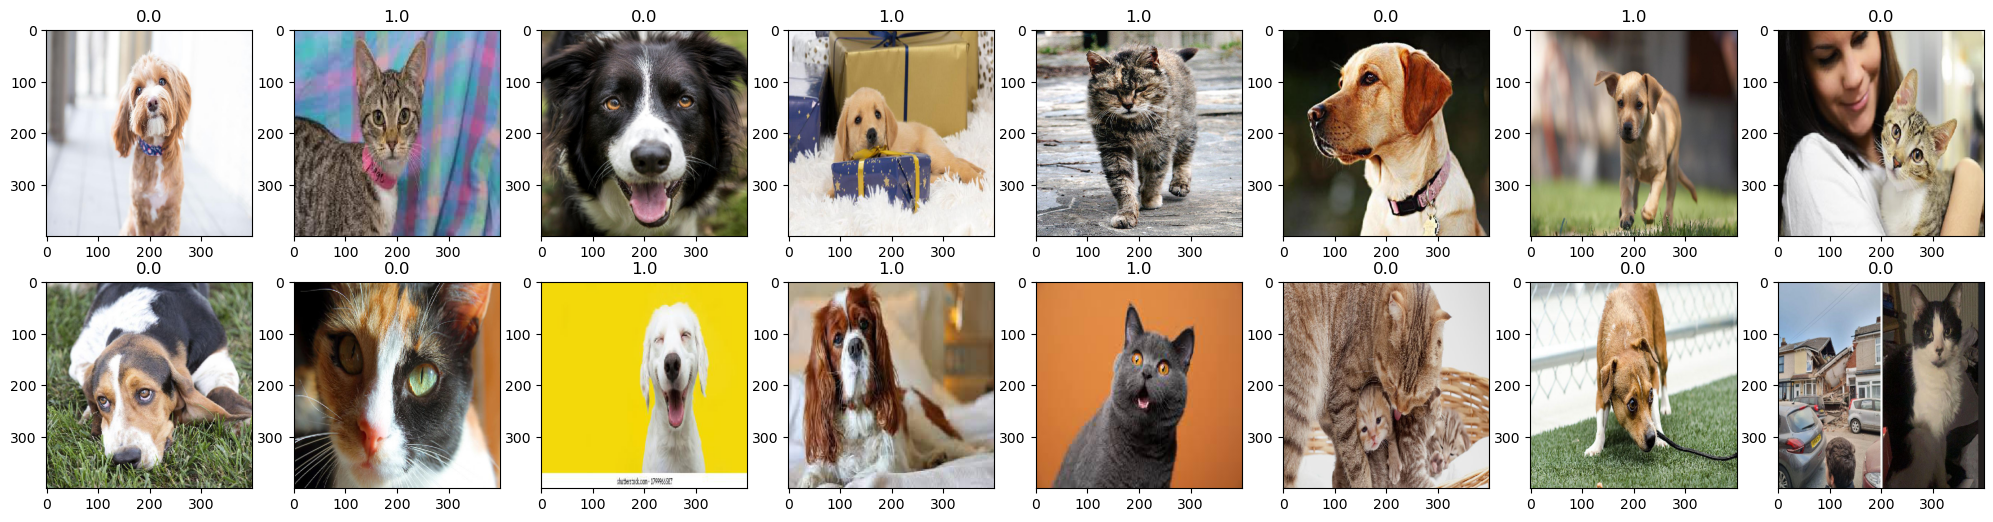

In [6]:
fig,ax = plt.subplots(nrows=2,ncols=8,figsize=(25,6))
n=0
for i in range(2):
  for j in range(8):
    img = data.next()[0][n].astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title(data.next()[1][n])
    n+=1

# Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [7]:
train_datagen = ImageDataGenerator(
    
    rescale=1./255.,
    
    horizontal_flip=True,       
    
    vertical_flip=True,         
    
    rotation_range=90,          
    
    brightness_range=[0.2, 1.0], 
    
    shear_range=0.2,            
    
    width_shift_range=0.2,      
    
    height_shift_range=0.2,     
    
    zoom_range=0.2             
)

test_datagen = ImageDataGenerator(rescale=1./255.)

# Analisis Kode Augmentasi Gambar

Kode ini bertujuan untuk menghasilkan objek generator yang memuat data gambar dengan penerapan augmentasi. Berikut adalah analisis kode tersebut:

## `train_datagen` (Augmentasi Data Latih)
1. **`rescale=1./255.`:**
   - Menormalisasi nilai piksel gambar ke dalam rentang 0 hingga 1.

2. **`horizontal_flip=True`:**
   - Melakukan flipping horizontal pada gambar dengan kemungkinan 50%.

3. **`vertical_flip=True`:**
   - Melakukan flipping vertikal pada gambar dengan kemungkinan 50%.

4. **`rotation_range=90`:**
   - Melakukan rotasi gambar dalam rentang 0 hingga 90 derajat.

5. **`brightness_range=[0.2, 1.0]`:**
   - Mengatur rentang kecerahan gambar, dengan nilai minimum 0.2 dan nilai maksimum 1.0.

6. **`shear_range=0.2`:**
   - Melakukan shear transformation pada gambar dengan faktor shear 0.2.

7. **`width_shift_range=0.2`:**
   - Melakukan pergeseran horizontal pada gambar dengan rentang 0 hingga 0.2.

8. **`height_shift_range=0.2`:**
   - Melakukan pergeseran vertikal pada gambar dengan rentang 0 hingga 0.2.

9. **`zoom_range=0.2`:**
   - Melakukan zoom pada gambar dengan rentang 0 hingga 0.2.

## `test_datagen` (Normalisasi Data Uji)
1. **`rescale=1./255.`:**
   - Menormalisasi nilai piksel gambar ke dalam rentang 0 hingga 1.

## Analisis Tambahan
- Augmentasi gambar pada data pelatihan (training) membantu meningkatkan keberagaman dataset, sehingga model dapat belajar dengan lebih baik dan menghasilkan hasil yang lebih umum.
- Penerapan augmentasi yang dipilih, seperti flipping, rotasi, dan pergeseran, dapat membantu model mengenali objek dari berbagai sudut pandang dan kondisi pencahayaan.
- Normalisasi pada data uji membantu memastikan konsistensi skala piksel antara data pelatihan dan data uji.


In [8]:
train_gen = train_datagen.flow_from_directory(
    "/Users/achmadnauvaldi/DS/GradedChallange7/CATS&DOGS/train",
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    "/Users/achmadnauvaldi/DS/GradedChallange7/CATS&DOGS/test",
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


# Analisis Hasil Pemrosesan Data Menggunakan ImageDataGenerator

Dari keluaran yang diberikan, terlihat bahwa pemrosesan data menggunakan `ImageDataGenerator` telah dilakukan. Berikut adalah analisis dari hasil tersebut:

1. **Data Pelatihan (Train Data):**
   - Jumlah gambar: 557
   - Jumlah kelas: 2
   - Setiap gambar ditempatkan dalam salah satu dari dua kelas yang ada.
   - Data pelatihan digunakan untuk melatih model sehingga model dapat memahami pola dan fitur dari gambar-gambar ini.

2. **Data Validasi (Validation Data):**
   - Jumlah gambar: 140
   - Jumlah kelas: 2
   - Setiap gambar ditempatkan dalam salah satu dari dua kelas yang ada.
   - Data validasi digunakan untuk mengukur sejauh mana model dapat menggeneralisasi pada data yang tidak digunakan selama pelatihan.

3. **Kesimpulan:**
   - Total gambar yang digunakan dalam proses pelatihan dan validasi adalah 557 + 140 = 697 gambar.
   - Gambar-gambar ini dibagi ke dalam dua kelas yang ada.
   - Hasil ini menunjukkan bahwa dataset terdiri dari dua kelas, dan proses pemrosesan data menggunakan `ImageDataGenerator` telah berhasil menemukan dan memuat gambar-gambar tersebut.

Pastikan bahwa pembagian data pelatihan dan validasi mencerminkan distribusi yang seimbang antara kelas-kelas tersebut untuk mendapatkan hasil yang lebih baik saat melatih dan menguji model.


In [9]:
print(train_gen.class_indices)

{'cats': 0, 'dogs': 1}


# Analisis Kelas Indeks dalam Dataset

Dari output yang diberikan, terlihat bahwa kelas dalam dataset telah diindeks menggunakan `class_indices`. Berikut adalah analisis dari hasil tersebut:

1. **Indeks Kelas:**
   - Kelas 'cats' diindeks sebagai 0.
   - Kelas 'dogs' diindeks sebagai 1.

2. **Kesimpulan:**
   - Dengan indeks tersebut, setiap gambar dalam dataset diberi label kelas sesuai dengan indeks yang terkait.
   - Ini berarti bahwa selama pelatihan, model akan memprediksi kelas 'cats' sebagai 0 dan kelas 'dogs' sebagai 1.

3. **Relevansi dengan Model:**
   - Informasi ini sangat relevan saat melibatkan model klasifikasi yang memberikan output dalam bentuk probabilitas atau prediksi kelas tertentu.
   - Ketika model memberikan prediksi, indeks kelas ini dapat digunakan untuk mengonversi output model menjadi label kelas yang dapat diinterpretasikan.

Penting untuk memahami indeks kelas ini agar hasil prediksi model dapat diartikan dengan benar saat dianalisis atau dievaluasi.


# Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3))),
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Analisis Arsitektur Model Neural Network

Berikut adalah analisis dari arsitektur model neural network yang didefinisikan:

1. **Sequential Model:**
   - Model dibangun menggunakan `tf.keras.models.Sequential()`, yang merupakan model berurutan dengan lapisan-lapisan yang ditambahkan secara berurutan.

2. **Lapisan Konvolusi Pertama:**
   - Lapisan Conv2D dengan 32 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU.
   - Lapisan MaxPooling2D dengan ukuran pool (2,2).

3. **Lapisan Konvolusi Kedua:**
   - Lapisan Conv2D dengan 64 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU.
   - Lapisan MaxPooling2D dengan ukuran pool (2,2).
   - Lapisan Dropout dengan dropout rate 0.3 untuk mengurangi overfitting.

4. **Lapisan Konvolusi Ketiga:**
   - Lapisan Conv2D dengan 128 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU.
   - Lapisan MaxPooling2D dengan ukuran pool (2,2).
   - Lapisan Dropout dengan dropout rate 0.2 untuk mengurangi overfitting.

5. **Lapisan Global Average Pooling:**
   - Lapisan GlobalAveragePooling2D digunakan untuk mengurangkan dimensi spasial dari lapisan konvolusi sebelumnya.

6. **Lapisan Dropout:**
   - Lapisan Dropout dengan dropout rate 0.5 untuk mengurangi overfitting.

7. **Lapisan Dense (Fully Connected):**
   - Lapisan Dense dengan 512 unit dan fungsi aktivasi ReLU.

8. **Lapisan Output:**
   - Lapisan Dense dengan 1 unit dan fungsi aktivasi sigmoid. Ini sesuai dengan output biner (binary classification).

9. **Kompilasi Model:**
   - Model dikompilasi menggunakan optimizer Adam, fungsi loss binary_crossentropy (karena ini adalah masalah klasifikasi biner), dan metrik akurasi untuk evaluasi performa.

## Analisis Tambahan:
- Lapisan konvolusi bertanggung jawab untuk mengekstraksi fitur dari gambar.
- Lapisan MaxPooling digunakan untuk mengurangi dimensi gambar yang diekstraksi.
- Lapisan Dropout diterapkan untuk mencegah overfitting dengan secara acak menonaktifkan sejumlah unit selama pelatihan.
- Global Average Pooling digunakan untuk menghasilkan vektor fitur yang dapat digunakan sebagai input untuk lapisan Dense.
- Model ini sesuai untuk tugas klasifikasi biner pada gambar, dengan output mengindikasikan probabilitas kelas positif.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

# Analisis Hasil Import Libraries dan Arsitektur Model

## Informasi Data

- Data terdiri dari gambar kucing (cats) dan anjing (dogs).
- Terdapat 279 gambar kucing dan 278 gambar anjing dalam data pelatihan.
- Terdapat 70 gambar kucing dan 70 gambar anjing dalam data validasi.
- Total, terdapat 557 gambar dalam data pelatihan dan 140 gambar dalam data validasi.
- Data terbagi menjadi 2 kelas.

## Arsitektur Model Neural Network

### Model Sequential:

- Model ini dibangun menggunakan `tf.keras.models.Sequential()`.
- Arsitektur model memiliki lapisan-lapisan sebagai berikut:

### Lapisan Konvolusi Pertama:
- Conv2D dengan 32 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU.
- MaxPooling2D dengan ukuran pool (2,2).

### Lapisan Konvolusi Kedua:
- Conv2D dengan 64 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU.
- MaxPooling2D dengan ukuran pool (2,2).
- Lapisan Dropout dengan dropout rate 0.3 untuk mengurangi overfitting.

### Lapisan Konvolusi Ketiga:
- Conv2D dengan 128 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU.
- MaxPooling2D dengan ukuran pool (2,2).
- Lapisan Dropout dengan dropout rate 0.2 untuk mengurangi overfitting.

### Lapisan Global Average Pooling:
- GlobalAveragePooling2D digunakan untuk mengurangkan dimensi spasial dari lapisan konvolusi sebelumnya.

### Lapisan Dropout:
- Lapisan Dropout dengan dropout rate 0.5 untuk mengurangi overfitting.

### Lapisan Dense (Fully Connected):
- Dense dengan 512 unit dan fungsi aktivasi ReLU.

### Lapisan Output:
- Dense dengan 1 unit dan fungsi aktivasi sigmoid.
- Output berupa probabilitas untuk klasifikasi biner.

### Kompilasi Model:
- Model dikompilasi menggunakan optimizer Adam, loss binary_crossentropy, dan metrik akurasi.

### Parameter Model:
- Total parameter model: 159,809.
- Semua parameter dapat di-train (trainable).

### Kesimpulan:
- Model ini sesuai untuk tugas klasifikasi biner gambar kucing dan anjing.
- Dengan menggunakan dropout, model memiliki kemampuan untuk mengatasi overfitting.
- Output berupa probabilitas kelas '1' (anjing) menggunakan fungsi aktivasi sigmoid.
- Jumlah parameter yang dapat di-train adalah 159,809.


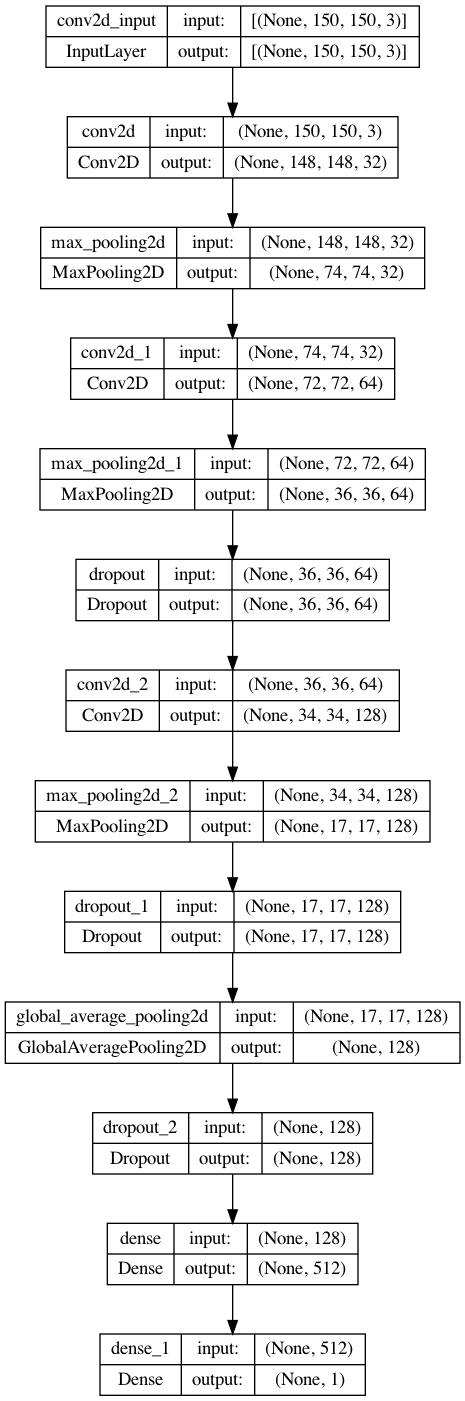

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

### **VGG16**

In [13]:
# Buat model VGG16 tanpa lapisan output terakhir
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Bekukan lapisan-lapisan di VGG16 agar tidak dapat dilatih lagi
for layer in base_model.layers:
    layer.trainable = False

# Tambahkan lapisan-lapisan yang Anda definisikan sebelumnya setelah VGG16
model1 = models.Sequential()
model1.add(base_model)
model1.add(layers.GlobalAveragePooling2D())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Analisis Model VGG16 Tanpa Lapisan Output Terakhir

## Arsitektur Model:

1. **Base Model (VGG16):**
   - Menggunakan arsitektur VGG16 pre-trained pada dataset imagenet.
   - Mengatur `include_top=False` untuk menghilangkan lapisan output terakhir (fully connected layer) dari VGG16.
   - `input_shape=(224, 224, 3)` menyesuaikan dengan format gambar yang digunakan (lebar, tinggi, dan saluran warna RGB).

2. **Bekukan Lapisan-lapisan VGG16:**
   - Seluruh lapisan di dalam base model (VGG16) dibekukan (`layer.trainable = False`). Hal ini dilakukan agar lapisan-lapisan ini tidak dapat dilatih kembali selama proses fine-tuning.

3. **Lapisan Tambahan (Pada Model Sekuensial Baru):**
   - GlobalAveragePooling2D: Mengurangkan dimensi spasial dari lapisan konvolusi sebelumnya.
   - Dropout (0.5): Lapisan dropout dengan dropout rate 0.5 untuk mengurangi overfitting.
   - Dense (512, activation='relu'): Lapisan fully connected dengan 512 unit dan fungsi aktivasi ReLU.
   - Dense (1, activation='sigmoid'): Lapisan output dengan 1 unit dan fungsi aktivasi sigmoid, cocok untuk klasifikasi biner.

## Kompilasi Model:

- Model dikompilasi menggunakan binary_crossentropy sebagai fungsi loss (sesuai dengan klasifikasi biner), optimizer Adam, dan metrik akurasi.

## Kesimpulan:

- Model ini adalah model gabungan antara arsitektur VGG16 (tanpa output terakhir) dan beberapa lapisan tambahan.
- Lapisan tambahan yang diperkenalkan bertujuan untuk menyesuaikan model VGG16 dengan tugas klasifikasi biner tertentu.
- Dengan membekukan lapisan-lapisan VGG16, kita memanfaatkan representasi fitur yang telah dipelajari pada dataset imagenet tanpa mengubah parameter-parameter tersebut selama fine-tuning.
- Kinerja model dapat dinilai melalui proses pelatihan dan evaluasi menggunakan metrik-metrik seperti akurasi dan binary cross-entropy loss.
- Model ini dapat dianggap sebagai dasar untuk fine-tuning pada dataset khusus.


In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,977,857
Trainable params: 263,169
Non-trainable params: 14,714,688
____________________________________

# Analisis Model Sekuensial dengan Arsitektur VGG16 (Tanpa Lapisan Output Terakhir)

## Ringkasan Model:

- **Nama Model:** "sequential_1"
- **Jumlah Total Parameter:** 14,977,857
- **Parameter Trainable:** 263,169
- **Parameter Non-Trainable (Beku):** 14,714,688

## Arsitektur Lapisan:

1. **VGG16 (Functional):**
   - Output Shape: (None, 7, 7, 512)
   - Jumlah Parameter: 14,714,688
   - Merupakan bagian dari model VGG16 yang diimpor dari model pre-trained pada dataset imagenet.
   - Lapisan ini tidak dapat dilatih ulang (non-trainable).

2. **GlobalAveragePooling2D:**
   - Output Shape: (None, 512)
   - Mengurangkan dimensi spasial dari keluaran lapisan VGG16.
   - Tidak memiliki parameter yang dapat dilatih.

3. **Dropout:**
   - Output Shape: (None, 512)
   - Digunakan untuk mengurangi overfitting dengan mengabaikan secara acak sebagian node selama pelatihan.
   - Tidak memiliki parameter yang dapat dilatih.

4. **Dense (512, activation='relu'):**
   - Output Shape: (None, 512)
   - Fully connected layer dengan 512 unit dan fungsi aktivasi ReLU.
   - Jumlah Parameter: 262,656

5. **Dense (1, activation='sigmoid'):**
   - Output Shape: (None, 1)
   - Fully connected layer dengan 1 unit (output biner) dan fungsi aktivasi sigmoid.
   - Jumlah Parameter: 513

## Kesimpulan:

- Model ini memiliki arsitektur gabungan antara VGG16 (tanpa output terakhir) dan beberapa lapisan tambahan.
- VGG16 berperan sebagai ekstraktor fitur pre-trained dari dataset imagenet, sedangkan lapisan tambahan ditambahkan untuk tugas klasifikasi biner spesifik.
- Sebagian besar parameter (14,714,688) berasal dari lapisan VGG16 yang tidak dapat dilatih kembali (non-trainable), sementara lapisan tambahan yang dilatih menyumbang sekitar 263,169 parameter.
- Model ini cocok untuk fine-tuning pada dataset khusus dengan tetap memanfaatkan representasi fitur yang telah dipelajari oleh VGG16.
- Performa model dapat dinilai melalui proses pelatihan dan evaluasi menggunakan metrik-metrik seperti akurasi dan binary cross-entropy loss.


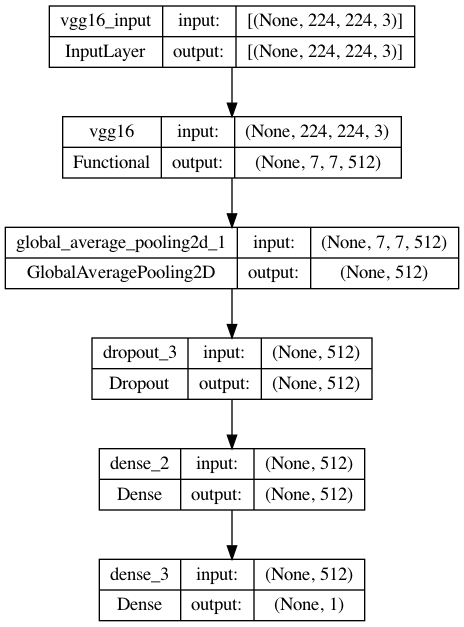

In [15]:
tf.keras.utils.plot_model(model1, show_shapes=True)

# Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [39]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('model_check.h5', save_best_only= True )
]

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2700):
            print("\nReached 0.2700 val_loss so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [18]:
history = model.fit(train_gen, epochs= 30,steps_per_epoch= 15, validation_data=test_gen, verbose=1,callbacks= callbacks)

Epoch 1/30


2023-12-18 18:05:18.176440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-18 18:05:18.180959: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5228

2023-12-18 18:05:23.613602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 6s 404ms/step - loss: 0.6935 - accuracy: 0.5228 - val_loss: 0.7017 - val_accuracy: 0.5000
Epoch 2/30
15/15 [==============================] - 6s 374ms/step - loss: 0.6944 - accuracy: 0.5054 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/30
15/15 [==============================] - 6s 386ms/step - loss: 0.6939 - accuracy: 0.4924 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/30
15/15 [==============================] - 6s 405ms/step - loss: 0.6898 - accuracy: 0.5125 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 5/30
15/15 [==============================] - 6s 392ms/step - loss: 0.6948 - accuracy: 0.5033 - val_loss: 0.6933 - val_accuracy: 0.4929
Epoch 6/30
15/15 [==============================] - 6s 385ms/step - loss: 0.6858 - accuracy: 0.5510 - val_loss: 0.7355 - val_accuracy: 0.5000
Epoch 7/30
15/15 [==============================] - 6s 383ms/step - loss: 0.6964 - accuracy: 0.5206 - val_loss: 0.7168 - val_accuracy: 0.5000
Epoch 8/30
15/15 

### **VGG16**

In [19]:
history1 = model1.fit(train_gen, epochs= 30,steps_per_epoch= 15, validation_data=test_gen, verbose=1, callbacks= callbacks)

Epoch 1/30


2023-12-18 18:08:30.298771: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - ETA: 0s - loss: 0.7497 - accuracy: 0.5098

2023-12-18 18:08:56.180560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 34s 2s/step - loss: 0.7497 - accuracy: 0.5098 - val_loss: 0.6505 - val_accuracy: 0.6071
Epoch 2/30
15/15 [==============================] - 34s 2s/step - loss: 0.6658 - accuracy: 0.5900 - val_loss: 0.6156 - val_accuracy: 0.6643
Epoch 3/30
15/15 [==============================] - 35s 2s/step - loss: 0.6630 - accuracy: 0.5922 - val_loss: 0.5868 - val_accuracy: 0.6929
Epoch 4/30
15/15 [==============================] - 35s 2s/step - loss: 0.6620 - accuracy: 0.5770 - val_loss: 0.6062 - val_accuracy: 0.6500
Epoch 5/30
15/15 [==============================] - 35s 2s/step - loss: 0.6523 - accuracy: 0.6074 - val_loss: 0.5639 - val_accuracy: 0.6929
Epoch 6/30
15/15 [==============================] - 35s 2s/step - loss: 0.6305 - accuracy: 0.6377 - val_loss: 0.5694 - val_accuracy: 0.6929
Epoch 7/30
15/15 [==============================] - 63s 4s/step - loss: 0.6114 - accuracy: 0.6551 - val_loss: 0.5696 - val_accuracy: 0.6929
Epoch 8/30
15/15 [=============

# Model monitoring

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

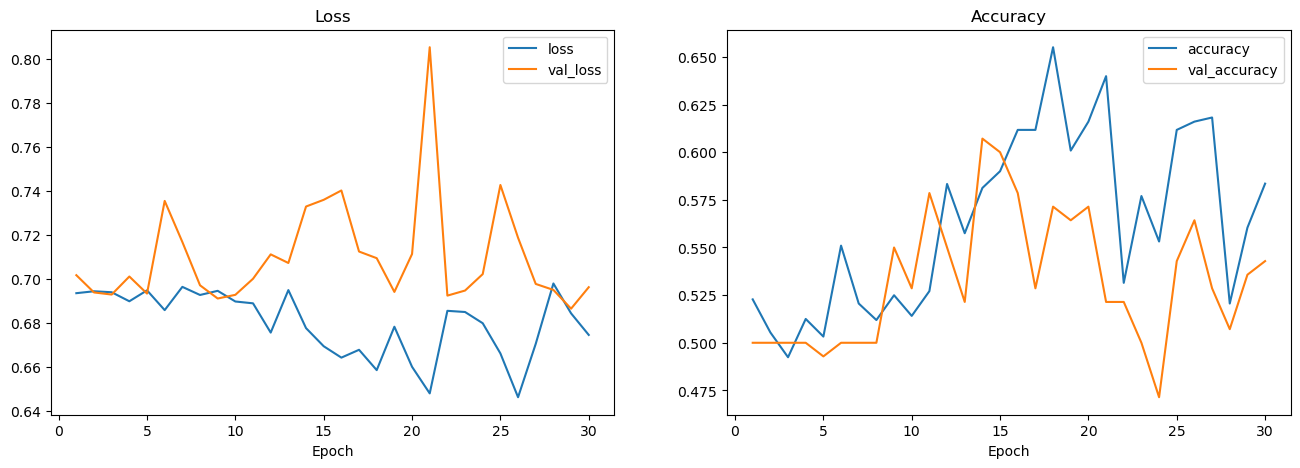

In [26]:
epoch = 30

fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax[0].plot(range(1, epoch + 1), history.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1, epoch + 1), history.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch + 1), history.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

### **VGG16**

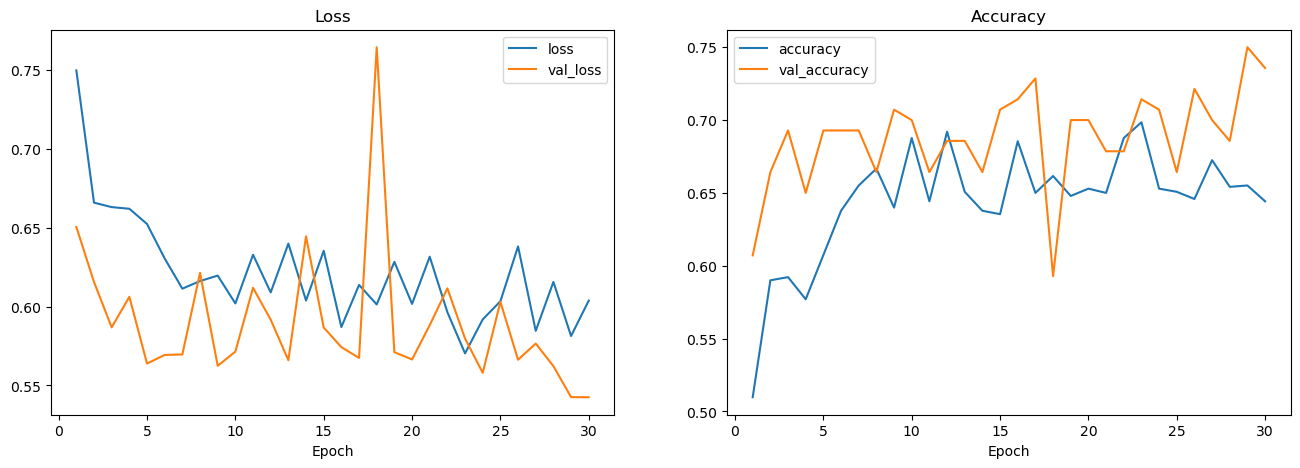

In [27]:
epoch = 30

fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax[0].plot(range(1, epoch + 1), history1.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history1.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

if 'val_loss' in history1.history:
    val_length = len(history1.history['val_loss'])
    ax[1].plot(range(1, val_length + 1), history1.history['accuracy'][:val_length], label='accuracy')
    ax[1].plot(range(1, val_length + 1), history1.history['val_accuracy'], label='val_accuracy')
else:
    ax[1].plot(range(1, epoch + 1), history1.history['accuracy'], label='accuracy')

ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

# Model Evaluation

In [28]:
pred = model1.predict(test_gen)

2023-12-18 18:28:22.150659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 7s 1s/step


In [29]:
y_pred = np.where(pred >= 0.5,1,0)

In [30]:
model1


2023-12-18 18:50:05.729829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 6s 1s/step
              precision    recall  f1-score   support

        cats       0.76      0.69      0.72        70
        dogs       0.71      0.79      0.75        70

    accuracy                           0.74       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.74      0.74      0.74       140



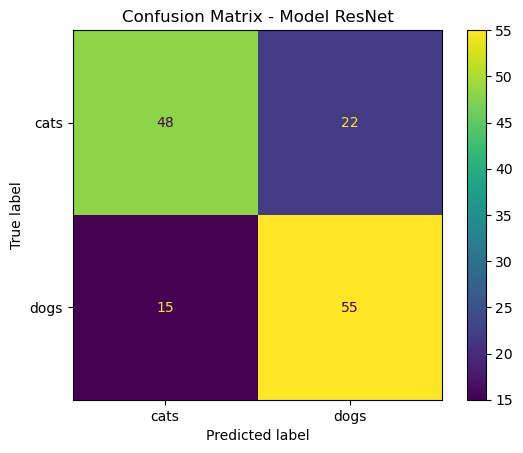

In [41]:
# Memprediksi menggunakan model ResNet
y_pred_test_resnet = model1.predict(test_gen)

# Mengonversi probabilitas ke label kelas
y_pred_test_resnet = (y_pred_test_resnet > 0.45).astype(int)

# Classification Report dan Confusion Matrix untuk Model EfficientNetV2B0
announce_resnet = classification_report(test_gen.labels,
                                        y_pred_test_resnet, labels=np.arange(2),
                                        target_names=list(test_gen.class_indices.keys()))
print(announce_resnet)

conf_matrix_resnet = confusion_matrix(test_gen.labels, y_pred_test_resnet)
disp_resnet = ConfusionMatrixDisplay(conf_matrix_resnet, display_labels=list(test_gen.class_indices.keys()))
disp_resnet.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix - Model ResNet')
plt.show()

# Analisis Hasil Evaluasi Model


## Interpretasi Hasil:

1. **Akurasi:**
   - Model mencapai akurasi sebesar 74%, yang merupakan persentase total prediksi yang benar dari keseluruhan data uji.

2. **Precision:**
   - Kelas 'cats': 76%
     - Dari semua instans yang diprediksi sebagai 'cats', 76% di antaranya adalah prediksi yang benar.
   - Kelas 'dogs': 71%
     - Dari semua instans yang diprediksi sebagai 'dogs', 71% di antaranya adalah prediksi yang benar.

3. **Recall:**
   - Kelas 'cats': 69%
     - Dari semua instans sebenarnya yang adalah 'cats', model dapat mengidentifikasi 69% di antaranya.
   - Kelas 'dogs': 79%
     - Dari semua instans sebenarnya yang adalah 'dogs', model dapat mengidentifikasi 79% di antaranya.

4. **F1-Score:**
   - F1-Score menggabungkan precision dan recall.
   - Kelas 'cats': 72%
   - Kelas 'dogs': 75%





Mengambil F1-Score sebagai metrik evaluasi memiliki alasan yang kuat, terutama dalam konteks klasifikasi biner. F1-Score merupakan suatu metrik yang menggabungkan precision dan recall, dan dirancang khusus untuk menangani kasus di mana kelas positif (dalam kasus ini, 'cats' atau 'dogs') dan kelas negatif memiliki distribusi yang tidak seimbang. Berikut adalah alasan utama untuk mengambil F1-Score:









# Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya.

In [ ]:
model.save('model.h5')
model1.save('model1.h5')

# Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Model Inference harus berada pada notebook yang berbeda dari notebook yang dipakai untuk pembuatan model.

##### Inference di file yang berbeda

# Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## Metrics:

- **Akurasi (Accuracy):** 74%
- **Precision:**
  - Kelas 'cats': 76%
  - Kelas 'dogs': 71%
- **Recall:**
  - Kelas 'cats': 69%
  - Kelas 'dogs': 79%
- **F1-Score:**
  - Kelas 'cats': 72%
  - Kelas 'dogs': 75%

## Kesimpulan:

- Model cenderung memiliki kinerja lebih baik dalam mengidentifikasi kelas 'dogs' (kelas mayoritas) dibandingkan dengan kelas 'cats'.
- Keseimbangan antara precision dan recall dapat dinilai dari nilai F1-Score yang cukup baik untuk kedua kelas.
- Meskipun akurasi model mencapai 74%, perlu diperhatikan bahwa konteks tugas klasifikasi biner dengan distribusi kelas tidak seimbang dapat mempengaruhi interpretasi akurasi.
- Evaluasi lebih lanjut dan fine-tuning mungkin diperlukan untuk meningkatkan performa model, terutama dalam mengidentifikasi kelas minoritas ('cats').

Menyeimbangkan Precision dan Recall:

F1-Score adalah rata-rata harmonik dari precision dan recall. Hal ini memastikan bahwa baik false positive (kesalahan memprediksi kelas positif) maupun false negative (kesalahan memprediksi kelas negatif) diperhitungkan.
Jika kita hanya melihat precision atau recall secara terpisah, mungkin mendapatkan informasi yang tidak lengkap. Misalnya, akurasi tinggi dapat terjadi jika model cenderung memprediksi mayoritas sebagai kelas mayoritas tanpa memperhatikan kelas minoritas.
Relevan untuk Kasus Ketidakseimbangan Kelas:

Jika distribusi kelas dalam dataset tidak seimbang, F1-Score memberikan ukuran performa yang lebih relevan daripada akurasi. Hal ini karena akurasi bisa keliru tinggi jika model cenderung memprediksi mayoritas sebagai kelas mayoritas.
Khusus untuk Klasifikasi Biner:

F1-Score dirancang khusus untuk klasifikasi biner dan memberikan informasi yang lebih kaya daripada metrik yang hanya menilai kesalahan pada satu dimensi (misalnya, hanya false positive atau false negative).
Menyediakan Keseimbangan Optimal:

Dengan mengambil rata-rata harmonik, F1-Score memberikan keseimbangan yang optimal antara precision dan recall. Ini memberikan gambaran yang lebih baik tentang sejauh mana model dapat mengidentifikasi dan memisahkan kelas positif dan negatif.
Oleh karena itu, memilih F1-Score sebagai metrik evaluasi akan memberikan informasi yang lebih komprehensif dan relevan, terutama dalam konteks klasifikasi biner dengan distribusi kelas yang tidak seimbang.
